<a href="https://colab.research.google.com/github/mostafadentist/python-ipynb/blob/main/Genome_Assembly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
def kmers(seq, k):
    return [seq[i:i+k] for i in range(len(seq)-k+1)]

seq = "ATGCGATGACCTGACT"
print("Example k-mers:", kmers(seq, 4))

Example k-mers: ['ATGC', 'TGCG', 'GCGA', 'CGAT', 'GATG', 'ATGA', 'TGAC', 'GACC', 'ACCT', 'CCTG', 'CTGA', 'TGAC', 'GACT']


In [85]:
from collections import defaultdict

def build_debruijn(reads, k):
    graph = defaultdict(list)
    for read in reads:
        for kmer in kmers(read, k):
            prefix = kmer[:-1]
            suffix = kmer[1:]
            graph[prefix].append(suffix)
    return graph

reads = ["ATGCG", "TGCGT", "GCGTT", "CGTTA", "GTTAC"]
dbg = build_debruijn(reads, 4)
print("De Bruijn Graph:")
for node, edges in dbg.items():
    print(node, "->", edges)

De Bruijn Graph:
ATG -> ['TGC']
TGC -> ['GCG', 'GCG']
GCG -> ['CGT', 'CGT']
CGT -> ['GTT', 'GTT']
GTT -> ['TTA', 'TTA']
TTA -> ['TAC']


In [86]:
def eulerian_path(graph):
    # Hierholzer’s algorithm
    graph_copy = {u: edges[:] for u, edges in graph.items()}
    start = next(iter(graph_copy))
    path, stack = [], [start]

    while stack:
        u = stack[-1]
        if graph_copy.get(u):
            v = graph_copy[u].pop()
            stack.append(v)
        else:
            path.append(stack.pop())
    return path[::-1]

path = eulerian_path(dbg)
print("Eulerian Path:", path)

Eulerian Path: ['ATG', 'TGC', 'GCG', 'GCG', 'CGT', 'CGT', 'GTT', 'GTT', 'TTA', 'TTA', 'TAC']


In [87]:
def path_to_genome(path):
    genome = path[0]
    for node in path[1:]:
        genome += node[-1]
    return genome

genome = path_to_genome(path)
print("Reconstructed Genome:", genome)

Reconstructed Genome: ATGCGGTTTTAAC


In [88]:
def overlap(a, b, min_length=3):
    start = 0
    while True:
        start = a.find(b[:min_length], start)
        if start == -1:
            return 0
        if b.startswith(a[start:]):
            return len(a)-start
        start += 1

reads = ["ATTAC", "TACAG", "CAGAT", "AGATT"]
for a in reads:
    for b in reads:
        if a != b:
            print(a, "->", b, ":", overlap(a,b))

ATTAC -> TACAG : 3
ATTAC -> CAGAT : 0
ATTAC -> AGATT : 0
TACAG -> ATTAC : 0
TACAG -> CAGAT : 3
TACAG -> AGATT : 0
CAGAT -> ATTAC : 0
CAGAT -> TACAG : 0
CAGAT -> AGATT : 4
AGATT -> ATTAC : 3
AGATT -> TACAG : 0
AGATT -> CAGAT : 0


In [89]:
reads = ["ATGCG", "TGCGT", "GCGTT", "CGTTA", "GTTAC"]
dbg = build_debruijn(reads, 4)
path = eulerian_path(dbg)
genome = path_to_genome(path)
print("Final Assembled Genome:", genome)

Final Assembled Genome: ATGCGGTTTTAAC


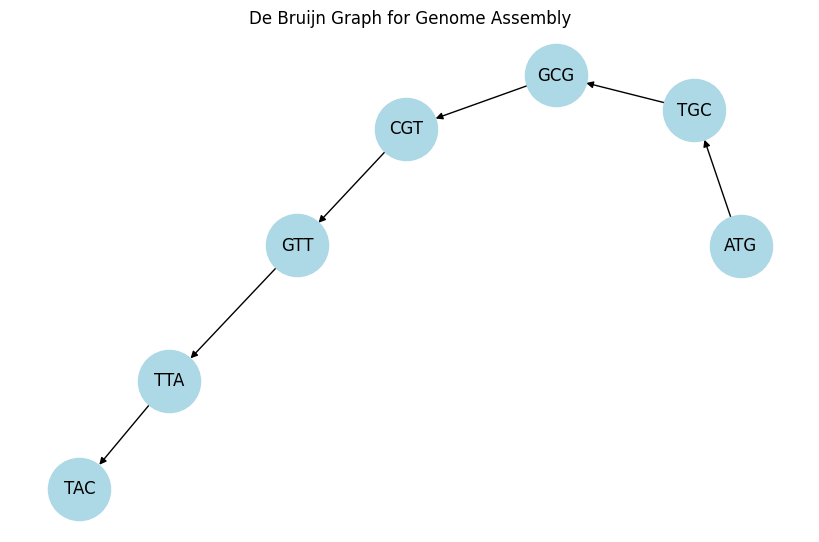

In [90]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
for u, edges in dbg.items():
    for v in edges:
        G.add_edge(u, v)

plt.figure(figsize=(8,5))
nx.draw(G, with_labels=True, node_size=2000, node_color="lightblue", arrows=True)
plt.title("De Bruijn Graph for Genome Assembly")
plt.show()